<a href="https://colab.research.google.com/github/jcestevezc/Machine-Learning-Techniques/blob/master/Laboratorio%201/Laboratorio_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img src="https://cursos.virtual.uniandes.edu.co/isis4219/wp-content/uploads/sites/162/2014/11/cropped-misisheader.png" ><br>
# Machine Learning Techniques - ISIS4219

Intersemestral 2020




## Objetivos

*   Familiarizarse con el ambiente de trabajo Jupyter Notebook
*   Resolver un problema real de regresión siguiendo el proceso de aprendizaje a partir de datos.



## Problema
<p style="text-align: justify;"> En el mercado inmobiliario, un aspecto que resulta de gran interés es cómo identificar rápidamente las oportunidades de inversión. Los precios de las viviendas pueden aumentar o caer rápidamente, pero los sitios online disponibles, que ofrecen casas en venta o alquiler, no se actualizan con la misma celeridad. Por otra parte, las personas que utilizan estas facilidades en línea lo hacen con el objetivo de obtener una buena recomendación sobre el monto para la transacción, pero estos sitios, al no tener un mecanismo de actualización de precios, no pueden suministrar apoyo en tiempo real para satisfacer tales requerimientos. Una de estas empresas desea desarrollar una aplicación que permita estimar el precio de mercado de casas de manera automática en función de la realidad del mercado. Un aspecto importante para ellos es poder identificar las características más relevantes que permitan alcanzar un alto rendimiento predictivo.</p>

### 1. Importando las librerias requeridas para el desarrollo del laboratorio

Para el manejo de los datos se van a utilizar las librerías de `Pandas` y para la visualización y perfilamiento se utilizará la librería `pandas-profiling`. En caso de no tener la librería en el ambiente de desarrollo, puede utilizar el siguiente comando.
```python
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
````

Además, para la preparación de los datos, entrenamiento del modelo y evaluación se utilizará la librería `scikit-learn`. <br>
Por último, para visualización de los datos se utiliza la librería `matplotlib`.

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

import numpy as np


### 2. Perfilamiento y entendimiento de los datos

#### Lectura de los datos
Primero, se leen los datos y se visualizan que se hayan leido correctamente.

In [2]:
url = 'https://raw.githubusercontent.com/jcestevezc/Machine-Learning-Techniques/master/Laboratorio%201/kc_house_data.csv'
data = pd.read_csv(url)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Entendimiento de los Datos
<b> Definición de las variables: </b> <br>
Este es el Diccionario de Datos proporcionado.
<br>
<b>id:</b> a notation for a house.<br>
<b>date:</b> Date house was sold.<br>
<b>price:</b> Price is prediction target.<br>
<b>bedrooms:</b> Number of Bedrooms/House.<br>
<b>bathrooms:</b> Number of bathrooms/House.<br>
<b>sqft_living:</b> square footage of the home.<br>
<b>sqft_lotsquare:</b> footage of the lot.<br>
<b>floors:</b> Total floors (levels) in house.<br>
<b>waterfront:</b> House which has a view to a waterfront.<br>
<b>view:</b> Has been viewed.<br>
<b>condition:</b> How good the condition is ( Overall ).<br>
<b>gradeoverall:</b> grade given to the housing unit, based on King County grading system.<br>
<b>sqft_above:</b> square footage of house apart from basement.<br>
<b>sqft_basement:</b> square footage of the basement.<br>
<b>yr_built:</b> Built Year.<br>
<b>yr_renovated:</b> Year when house was renovated.<br>
<b>zipcode:</b> zip.<br>
<b>lat:</b> Latitude coordinate.<br>
<b>long:</b> Longitude coordinate.<br>
<b>sqft_living15:</b> Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area.<br>
<b>sqft_lot15:</b> lotSize area in 2015(implies-- some renovations).<br>


Para visualizar la distribución, los valores que toman los datos, la cantidad de ceros o nulos, el tipo de dato y la correlación entre ellos, se utiliza `pandas-profiling`.

In [3]:
#ProfileReport(data)

In [4]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


### 3. Limpieza y preparación de datos

#### 3.1 Tratamiento de datos atípicos

Se identifica en el perfilamiento que los siguientes campos posiblemente tienen datos atípicos:
* Price
* Bedrooms
* Sqft_living

In [5]:
data = data[np.abs(data.price - data.price.mean()) <= ( 3 * data.price.std())]
data = data[~(np.abs(data.price - data.price.mean()) > (3 * data.price.std()))]

In [6]:
data.price.describe()

count    2.078900e+04
mean     4.882515e+05
std      2.254866e+05
min      7.500000e+04
25%      3.170000e+05
50%      4.400000e+05
75%      6.149500e+05
max      1.284000e+06
Name: price, dtype: float64

In [7]:
data = data[np.abs(data.bedrooms - data.bedrooms.mean()) <= ( 3 * data.bedrooms.std())]
data = data[~(np.abs(data.bedrooms - data.bedrooms.mean()) > (3 * data.bedrooms.std()))]

In [8]:
data.bedrooms.describe()

count    20487.000000
mean         3.299165
std          0.819721
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: bedrooms, dtype: float64

In [9]:
data = data[np.abs(data.sqft_living - data.sqft_living.mean()) <= ( 3 * data.sqft_living.std())]
data = data[~(np.abs(data.sqft_living - data.sqft_living.mean()) > (3 * data.sqft_living.std()))]

In [10]:
data.sqft_living.describe()

count    20255.000000
mean      1953.346186
std        735.355925
min        370.000000
25%       1400.000000
50%       1850.000000
75%       2420.000000
max       4190.000000
Name: sqft_living, dtype: float64

In [11]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### 3.2 Selección de campos

Primero, se construyen los conjuntos X y Y que van a ser utilizados en el modelo. Dado que queremos predecir el precio, la variable predictora (Y) tendrá el precio de los inmuebles. Y se utilizarán como variables descriptoras (X) las proporcionadas por el conjunto de dats excepto `id`, `date` y `zipcode` debido a que no son realmente descriptoras del problema, Además, como se muestra en la tabla de correlación, se establece un umbral de $0.8$ para establecer autocorrelación. Por ello, se decide eliminar la variable `sqft_above`.

In [12]:
X = data.drop(['id','date','zipcode','sqft_above','price'],axis=1)
y = data['price']
display(X.head())
print()
display(y.head())

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,47.6168,-122.045,1800,7503


0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

#### 3.3 Estandarización de campos

Debido a que los algoritmos de regresión se ven afectados por la escala en la que se encuentra cada uno de los atributos, es necesario aplicar una transformación para que todos queden en la misma escala.

In [13]:
columns = X.columns
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
X = pd.DataFrame(X,columns=columns)

In [14]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,0.50,0.190476,0.212042,0.003108,0.0,0.0,0.0,0.5,0.444444,0.000000,0.478261,0.000000,0.571498,0.217608,0.174550,0.008927
1,0.50,0.428571,0.575916,0.004072,0.4,0.0,0.0,0.5,0.444444,0.186047,0.443478,0.988089,0.908959,0.166113,0.239473,0.012479
2,0.25,0.190476,0.104712,0.005743,0.0,0.0,0.0,0.5,0.333333,0.000000,0.286957,0.000000,0.936143,0.237542,0.430532,0.013235
3,0.75,0.571429,0.416230,0.002714,0.0,0.0,0.0,1.0,0.444444,0.423256,0.565217,0.000000,0.586939,0.104651,0.178260,0.007767
4,0.50,0.380952,0.342932,0.004579,0.0,0.0,0.0,0.5,0.555556,0.000000,0.756522,0.000000,0.741354,0.393688,0.259878,0.012236


Con las variables definidas, se procede a construir los conjuntos de entrenamiento y test.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
6433,0.75,0.190476,0.353403,0.002356,0.2,0.0,0.5,0.50,0.444444,0.000000,0.243478,0.0,0.841563,0.097176,0.322946,0.006874
19972,0.75,0.476190,0.570681,0.002835,0.4,0.0,0.0,0.50,0.444444,0.000000,0.947826,0.0,0.540454,0.303987,0.398998,0.007159
18888,0.50,0.476190,0.340314,0.002120,0.4,0.0,0.0,0.50,0.444444,0.000000,0.947826,0.0,0.601737,0.208472,0.235763,0.006016
16095,0.50,0.333333,0.416230,0.003029,0.0,0.0,0.0,0.75,0.444444,0.409302,0.452174,0.0,0.800386,0.101329,0.245038,0.009124
8172,0.25,0.190476,0.180628,0.001858,0.0,0.0,0.0,0.75,0.444444,0.046512,0.226087,0.0,0.830304,0.102990,0.217214,0.005518


### 4. Modelamiento
#### Regresión Lineal.

In [16]:
LinearModel = LinearRegression().fit(X_train, y_train)
print ('Coefficients: ', LinearModel.coef_)
print ('Intercept: ',LinearModel.intercept_)

Coefficients:  [ -57242.09358619  134131.38838936  319400.74810046  362602.39294074
   79444.59752804  128482.91653863  138664.96194342  118054.56785303
  685709.93852194    4309.24255744 -207850.47152089   36277.15045601
  331312.20702976  -35102.32458706  273345.39190855  -94709.96078774]
Intercept:  -265484.44662939507


In [17]:
list(zip(X_train, LinearModel.coef_))

[('bedrooms', -57242.0935861918),
 ('bathrooms', 134131.38838935574),
 ('sqft_living', 319400.7481004553),
 ('sqft_lot', 362602.39294073905),
 ('floors', 79444.59752803664),
 ('waterfront', 128482.91653863012),
 ('view', 138664.9619434222),
 ('condition', 118054.56785302886),
 ('grade', 685709.9385219362),
 ('sqft_basement', 4309.242557443606),
 ('yr_built', -207850.47152088763),
 ('yr_renovated', 36277.15045601247),
 ('lat', 331312.2070297571),
 ('long', -35102.324587059746),
 ('sqft_living15', 273345.3919085507),
 ('sqft_lot15', -94709.96078774222)]

#### Regresión Polinomial


In [34]:
pf = PolynomialFeatures(degree = 3,interaction_only=True)    # usaremos polinomios de grado 2
X_pol = pf.fit_transform(X)  # transformamos la entrada en polinómica
X_train_pol, X_test_pol, y_train, y_test = train_test_split(X_pol, y, test_size=0.2, random_state=33)

PolyModel = LinearRegression().fit(X_train_pol, y_train)
print ('Coefficients: ', PolyModel.coef_)
print ('Intercept: ',PolyModel.intercept_)

Coefficients:  [ 4.63048724e-07  3.72224662e+05  5.86051584e+05 -4.80972631e+05
  1.80309668e+06 -4.69657507e+05 -1.90123107e+06  4.14151776e+05
  4.29746285e+05  6.02987767e+05 -1.78177623e+05  6.70617128e+05
  1.06863341e+05  8.31264710e+05 -5.09243517e+05 -1.87939040e+06
  2.79454178e+06 -4.48640760e+05  1.80133820e+05  1.09278769e+06
  8.94908777e+04  4.07112795e+05 -6.51858079e+05 -2.43849234e+05
 -1.60971093e+06  3.24622103e+05  4.65866347e+05  2.55684064e+04
 -5.43343719e+05 -2.60034247e+05  1.19276482e+06 -3.40738532e+06
 -1.25935239e+05  7.90702552e+06  3.73965606e+05  3.05803687e+06
 -9.14646477e+05 -4.38664281e+05 -3.35700829e+06  4.65619907e+05
 -9.07766039e+05  1.16859150e+05  5.48524307e+05 -4.10047005e+05
  4.44091467e+06 -3.57160010e+06  7.57318495e+05 -7.83809424e+05
  4.99560052e+05  3.30093983e+05  8.18089616e+05  3.09019454e+06
 -3.97289889e+05 -7.85321595e+05  1.70228091e+05  6.35695627e+05
 -2.16952274e+05 -2.87524109e+06  7.54644215e+06  8.25273829e+06
 -2.671065

In [19]:
list(zip(pf.get_feature_names(X_train.columns), PolyModel.coef_))


[('1', -1.1007285797514054e-10),
 ('bedrooms', -67353.02756034161),
 ('bathrooms', -105639.77190434243),
 ('sqft_living', -113298.52146115017),
 ('sqft_lot', -76397.46662063088),
 ('floors', 11413.152498747164),
 ('waterfront', -338912.1545357999),
 ('view', 137825.0524402146),
 ('condition', -82105.91824584513),
 ('grade', 91560.57629835245),
 ('sqft_basement', 106142.65454073736),
 ('yr_built', 38259.56704596877),
 ('yr_renovated', 49417.105783854466),
 ('lat', 118471.72659411858),
 ('long', -122035.73571252223),
 ('sqft_living15', 25601.336298200215),
 ('sqft_lot15', 236641.84314257448),
 ('bedrooms bathrooms', 113527.83871806174),
 ('bedrooms sqft_living', -179379.86656825783),
 ('bedrooms sqft_lot', 312341.3145459922),
 ('bedrooms floors', 140013.98804209573),
 ('bedrooms waterfront', 20341.607629642465),
 ('bedrooms view', -52427.98168256296),
 ('bedrooms condition', -17002.05276490561),
 ('bedrooms grade', 248059.47670150746),
 ('bedrooms sqft_basement', 18190.767152639382),
 ('

### 5. Predicción

Una vez realizado el entrenamiento del modelo es necesario realizar una predicción con los datos de prueba, que servira como insumo para la evaluación y/o validación de la calidad del modelo.

In [20]:
y_prediction_lineal = LinearModel.predict(X_test)
y_prediction_lineal

array([207351.737494  , 622683.4987817 , 226205.853916  , ...,
       436901.4091467 , 492594.7608403 , 647011.23895243])

In [35]:
y_prediction_poly = PolyModel.predict(X_test_pol)
y_prediction_poly

array([207913.32263714, 641648.96703998, 105118.26261212, ...,
       443499.61482153, 503428.33407367, 587654.62796421])

### 6. Validación

Existen diferentes métricas de evaluación del modelo: 

* **Error absoluto medio**: es la media del valor absoluto de los errores. Esta es la métrica más fácil de entender, ya que es solo un error promedio.
* **Error cuadrado medio (MSE)**: el error cuadrado medio (MSE) es la media del error cuadrado. Es más popular que el error absoluto medio porque el enfoque se orienta más hacia errores grandes. Esto se debe a que el término cuadrado aumenta exponencialmente los errores más grandes en comparación con los más pequeños.
* **Error cuadrático medio de raíz (RMSE)**: esta es la raíz cuadrada del error cuadrático medio.
* **R cuadrado no es un error**, pero es una métrica popular para la precisión de su modelo. Representa lo cerca que están los datos de la línea de regresión ajustada. Cuanto más alto sea el R cuadrado, mejor se ajustará el modelo a sus datos. El mejor puntaje posible es 1.0 y puede ser negativo (porque el modelo puede ser arbitrariamente peor).








In [36]:
print('------------ Regresión Lineal ------------')
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_prediction_lineal - y_test)))
print("Residual sum of squares (MSE): %.2f" % mean_squared_error(y_prediction_lineal , y_test))
print("R2-score: %.2f" % r2_score(y_prediction_lineal , y_test) )

print('---------- Regresión Polinomial ----------')
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_prediction_poly - y_test)))
print("Residual sum of squares (MSE): %.2f" % mean_squared_error(y_prediction_poly , y_test))
print("R2-score: %.2f" % r2_score(y_prediction_poly , y_test) )

------------ Regresión Lineal ------------
Mean absolute error: 92071.16
Residual sum of squares (MSE): 15101893118.54
R2-score: 0.55
---------- Regresión Polinomial ----------
Mean absolute error: 84781.59
Residual sum of squares (MSE): 15205911711.48
R2-score: 0.62


Para visualizar mejor los resultados, se realiza una gráfica con los datos de prueba para visualizar el rendimiento del modelo.

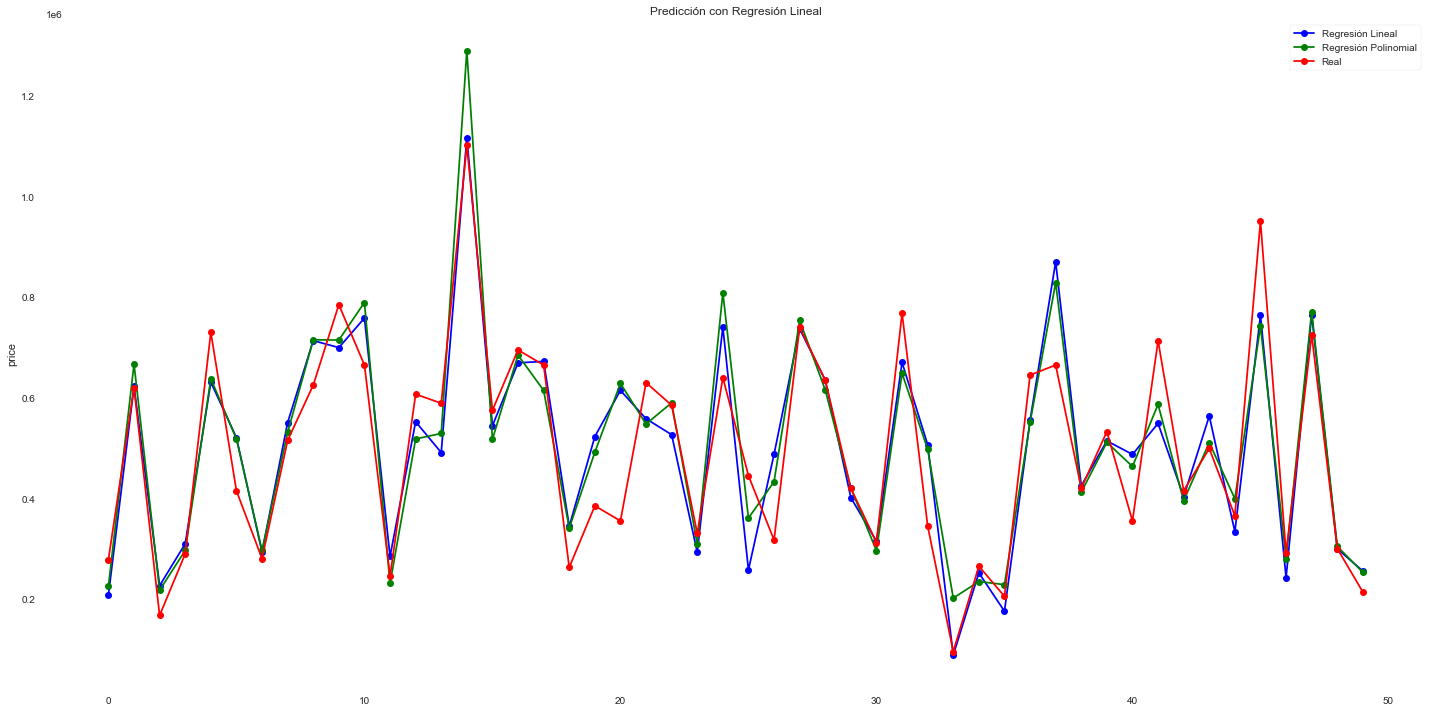

In [23]:
fig = plt.figure(figsize=(20,10))


ax = fig.add_subplot(111)
xvals = list(range(len(y_test[:50])))
ax.plot(xvals, y_prediction_lineal[:50],'bo-', label='Regresión Lineal')
ax.plot(xvals, y_prediction_poly[:50],'go-', label='Regresión Polinomial')
ax.plot(xvals, y_test[:50],'ro-', label='Real')

ax.set(title='Predicción con Regresión Lineal',ylabel=y.name)
ax.legend()

plt.tight_layout()
plt.show()

## Taller
Con los mismos datos proporcionados anteriormente, realice las siguientes actividades:

1. Construir una tabla que muestre los valores de las medidas de rendimiento con grados de polinomio 2, 3, 4, 10 y 20 ¿Qué puede concluir?
2. Resuelva el mismo problema con el algoritmo K-NN para regresión, y muestre los valores de rendimiento sobre entrenamiento y test utilizando los valores de K = 1, 2, 3, 5, 10, 20 y 30. ¿Qué puede concluir? 


# 1. Rendimiento con grados de polinomio

## Warning: The next code block takes up to 7.5 hours to run

2 done (time elapsed: 0.17 seconds)
3 done (time elapsed: 0.72 seconds)
4 done (time elapsed: 6.80 seconds)
10 done (time elapsed: 7830.22 seconds)
20 done (time elapsed: 11894.59 seconds)

------------ Results ------------
   Polynomial degree           MAE           MSE  R2-score  Elapsed Time
0                  2  8.422887e+04  1.339720e+10  0.625918      0.174839
1                  3  8.478159e+04  1.520591e+10  0.616915      0.722423
2                  4  1.833676e+05  2.590582e+12  0.005610      6.795442
3                 10  3.262135e+13  3.535364e+29 -0.000277   7830.224880
4                 20  1.174972e+14  6.373509e+30 -0.000414  11894.589576



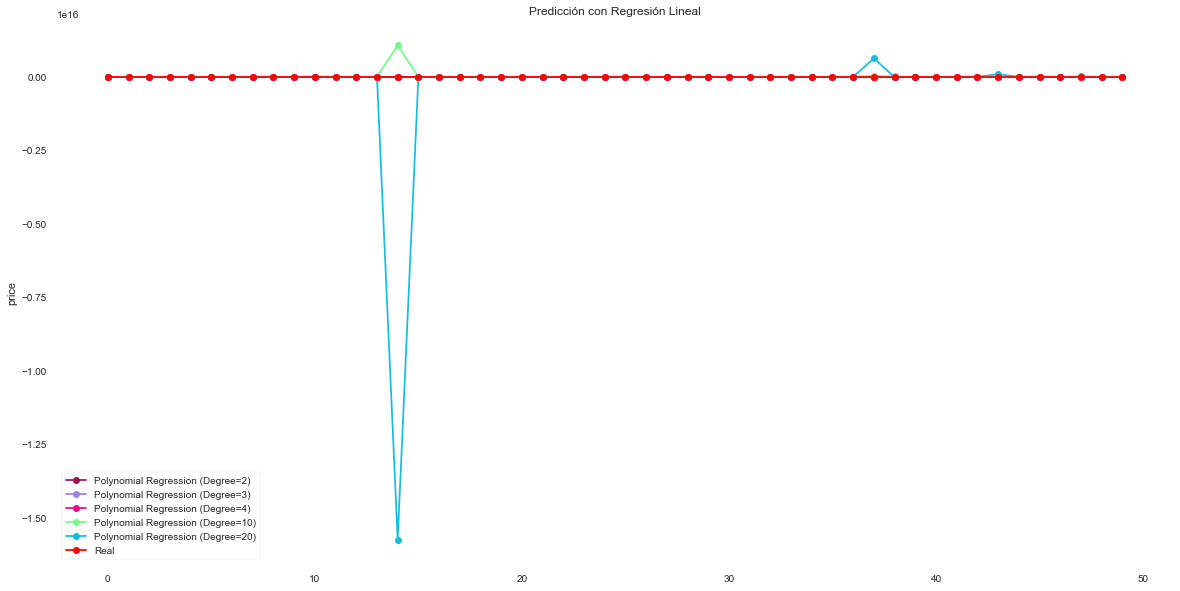

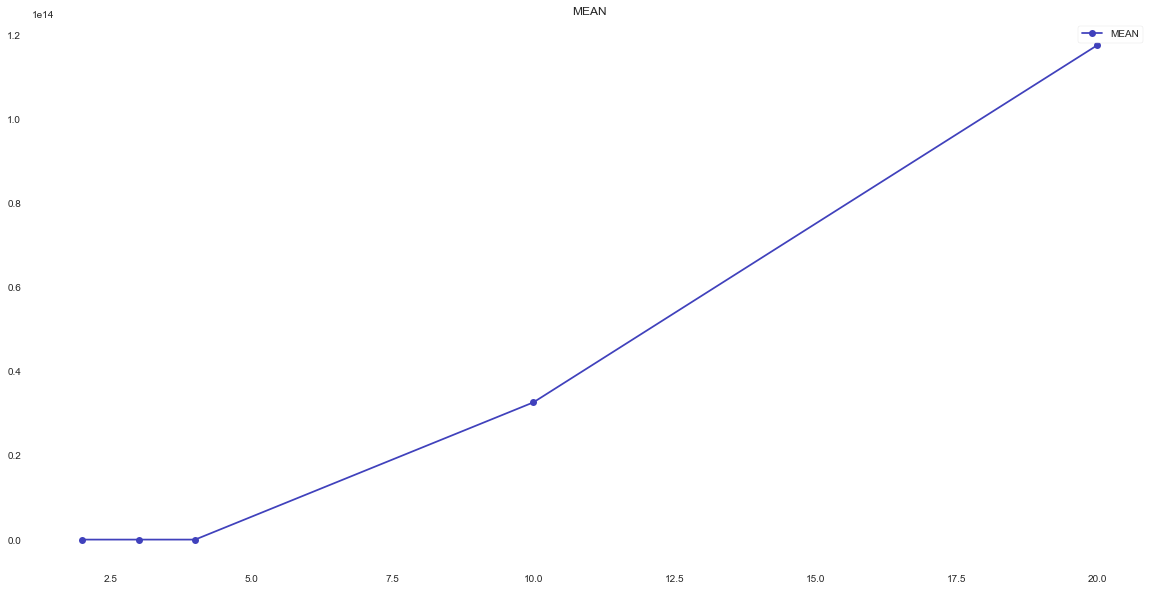

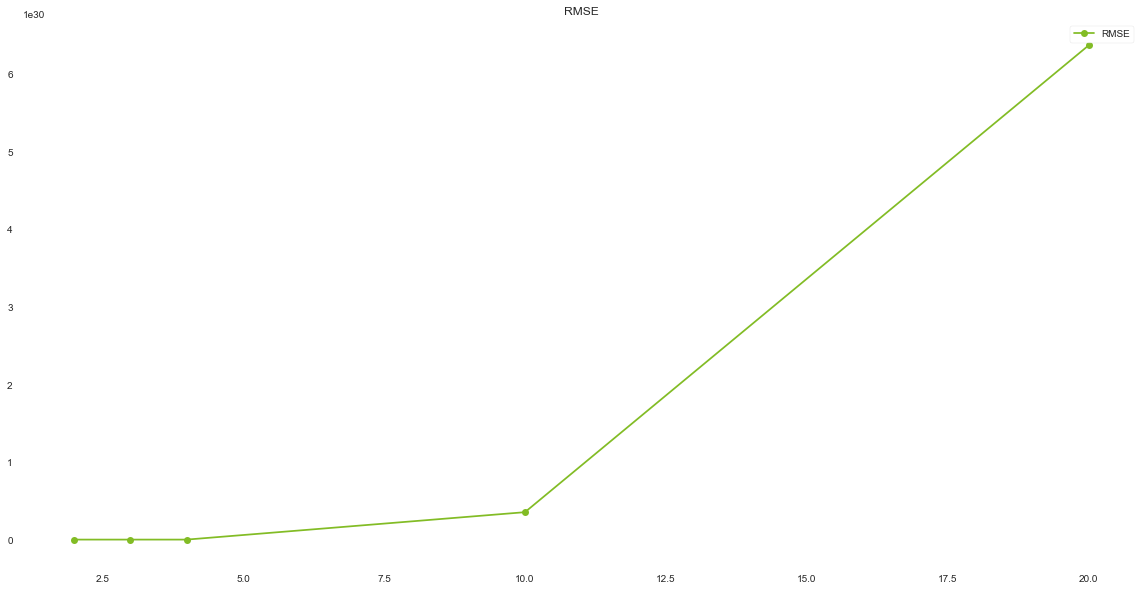

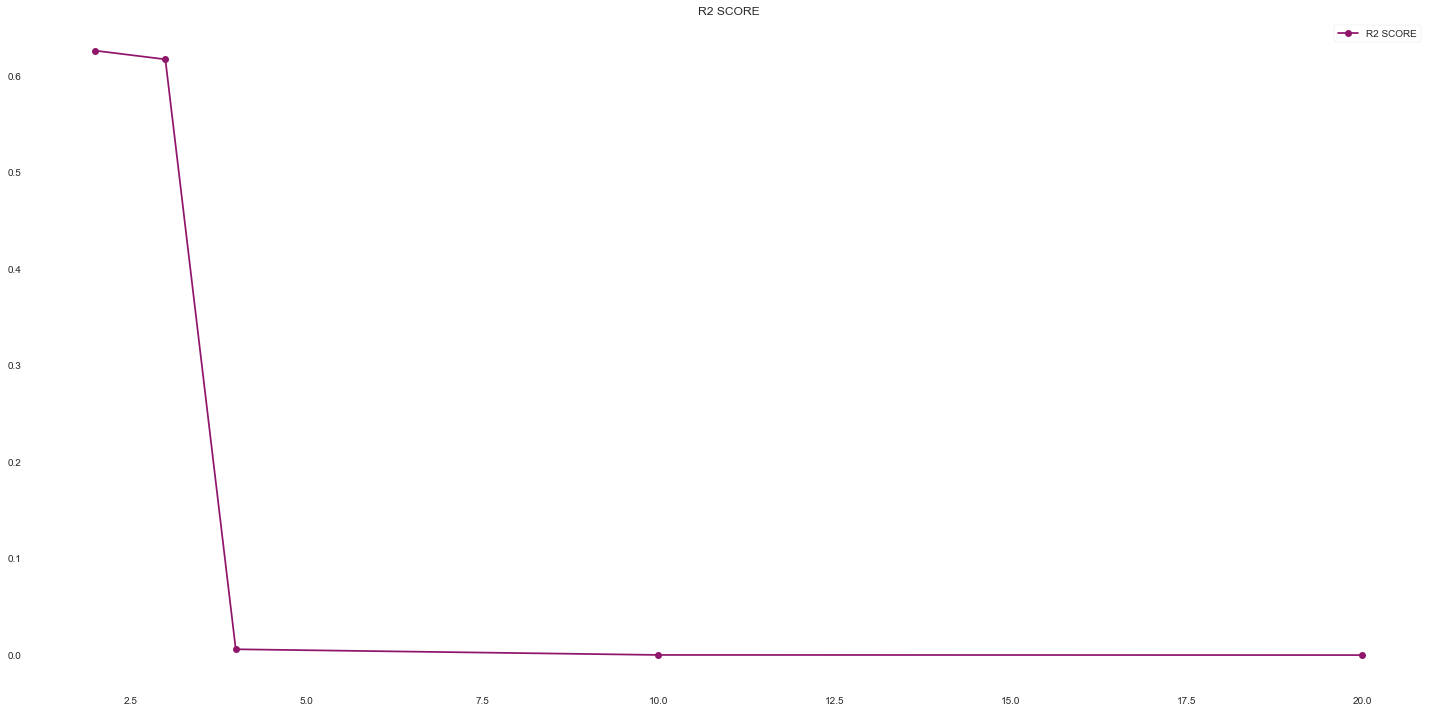

In [33]:
import time

# figures
fig_pl = plt.figure(figsize=(20,10))
fig_mean_pl = plt.figure(figsize=(20,10))
fig_remse_pl = plt.figure(figsize=(20,10))
fig_r2_score_pl = plt.figure(figsize=(20,10))

ax_pl = fig_pl.add_subplot(111)
mean_plot_pl = fig_mean_pl.add_subplot(111)
rmse_plot_pl = fig_remse_pl.add_subplot(111)
r2_score_plot_pl = fig_r2_score_pl.add_subplot(111)

xvals = list(range(len(y_test[:50])))

# loop through the different polynomial degrees
degrees = [2, 3, 4, 10, 20]
MAE = []
MSE = []
R2 = []
elapsed_times = []
for degree in degrees:
  start = time.time()
  pf = PolynomialFeatures(degree = degree,interaction_only=True)    # usaremos polinomios de grado 2, 3, 4, 5, 10, y 20
  X_pol = pf.fit_transform(X)  # transformamos la entrada en polinómica
  X_train_pol, X_test_pol, y_train, y_test = train_test_split(X_pol, y, test_size=0.2, random_state=33)
  PolyModel = LinearRegression().fit(X_train_pol, y_train)
  predictions = PolyModel.predict(X_test_pol)
  MAE.append(np.mean(np.absolute(predictions - y_test)))
  MSE.append(mean_squared_error(predictions , y_test))
  R2.append(r2_score(predictions , y_test))
  end = time.time()
  elapsed = end - start
  elapsed_times.append(elapsed)

  label = 'Polynomial Regression (Degree=%d)' % degree
  ax_pl.plot(xvals, predictions[:50], color=np.random.rand(3,), marker='o', linestyle='solid', label=label)

  print("{} done (time elapsed: {:.2f} seconds)".format(degree,elapsed))

# print results
results_data = {'Polynomial degree': degrees, 'MAE': MAE, 'MSE': MSE, 'R2-score': R2, 'Elapsed Time': elapsed_times }
df = pd.DataFrame(results_data)
print()
print('------------ Results ------------')
print(df)
print()

# plots
ax_pl.plot(xvals, y_test[:50], 'ro-', label='Real')
ax_pl.set(title='Predicción con Regresión Lineal', ylabel=y.name)
ax_pl.legend()

label = 'MEAN'
mean_plot_pl.plot(degrees, MAE, color=np.random.rand(3,), marker='o', linestyle='solid', label=label)
mean_plot_pl.set(title=label)
mean_plot_pl.legend()

label = 'RMSE'
rmse_plot_pl.plot(degrees, MSE, color=np.random.rand(3,), marker='o', linestyle='solid', label=label)
rmse_plot_pl.set(title=label)
rmse_plot_pl.legend()

label = 'R2 SCORE'
r2_score_plot_pl.plot(degrees, R2, color=np.random.rand(3,), marker='o', linestyle='solid', label=label)
r2_score_plot_pl.set(title=label)
r2_score_plot_pl.legend()

plt.tight_layout()
plt.show()

In [104]:
#df = pd.read_pickle("./results_polynomial.pkl")
#df

Se puede concluir que a medida que el modelo se ajusta más a los datos de training, con un grado de polinomio más alto, todas las medidas de error aumentan en el conjunto de Test de manera exponencial. Este es un ejemplo claro de sobreajuste por modelo más complejo. Llama la atención que la diferencia en las predicciones se hace más notoria en los datos atípicos, que no es capás de modelar correctamente.

También se ve cómo correr modelos más complejos hacen que el tiempo de ejecución aumente significativamente. Mientras los polinomios de grado bajo (2, 3, y 4) corrieron en máximo unos pocos segundos, los de grado más alto se demoraron varias horas.

# 2. Knn

In [29]:
from sklearn import neighbors

n_neighbors = 3
knn = neighbors.KNeighborsRegressor(n_neighbors=n_neighbors)
y_prediction_knn = knn.fit(X_train, y_train).predict(X_test)

In [30]:
print('------------ Neirest Neighbors Regression ------------')
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_prediction_knn - y_test)))
print("Residual sum of squares (MSE): %.2f" % mean_squared_error(y_prediction_knn , y_test))
print("R2-score: %.2f" % r2_score(y_prediction_knn , y_test) )

------------ Neirest Neighbors Regression ------------
Mean absolute error: 73518.07
Residual sum of squares (MSE): 11754802618.63
R2-score: 0.70


------------ Neirest Neighbors Regression (1) ------------
Mean absolute error: 87518.27
Residual sum of squares (MSE): 17261867002.09
R2-score: 0.63
------------ Neirest Neighbors Regression (2) ------------
Mean absolute error: 77492.94
Residual sum of squares (MSE): 13020169485.45
R2-score: 0.69
------------ Neirest Neighbors Regression (3) ------------
Mean absolute error: 73518.07
Residual sum of squares (MSE): 11754802618.63
R2-score: 0.70
------------ Neirest Neighbors Regression (5) ------------
Mean absolute error: 71055.88
Residual sum of squares (MSE): 10909066984.72
R2-score: 0.71
------------ Neirest Neighbors Regression (10) ------------
Mean absolute error: 70648.98
Residual sum of squares (MSE): 10701742899.74
R2-score: 0.69
------------ Neirest Neighbors Regression (20) ------------
Mean absolute error: 72040.16
Residual sum of squares (MSE): 11026608679.69
R2-score: 0.66
------------ Neirest Neighbors Regression (30) ------------
Mean absolute error: 73402.95
Residual

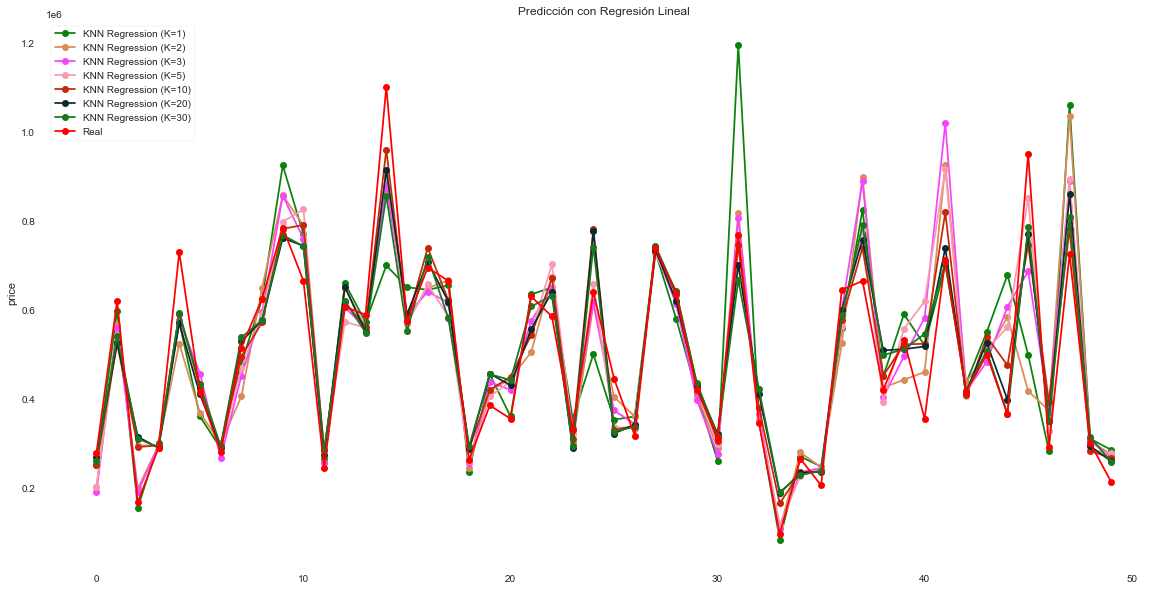

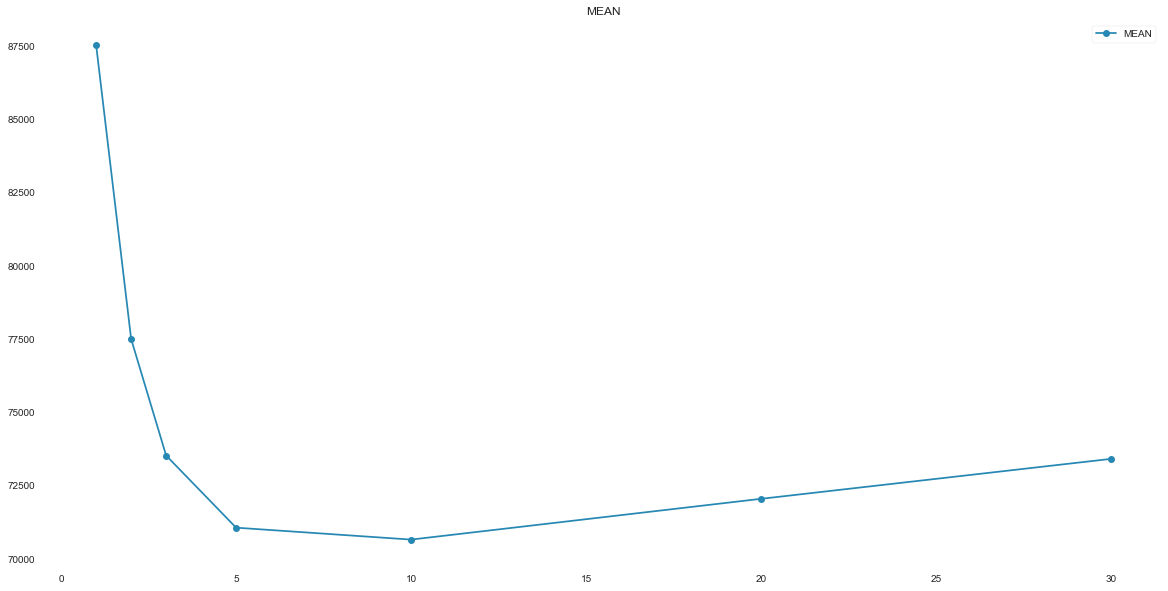

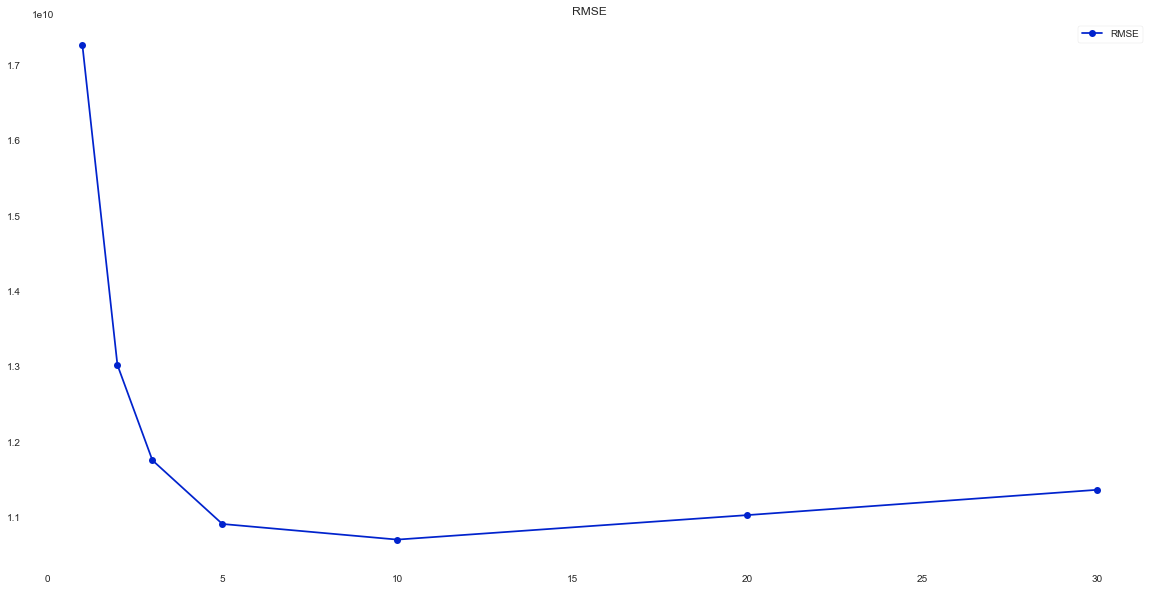

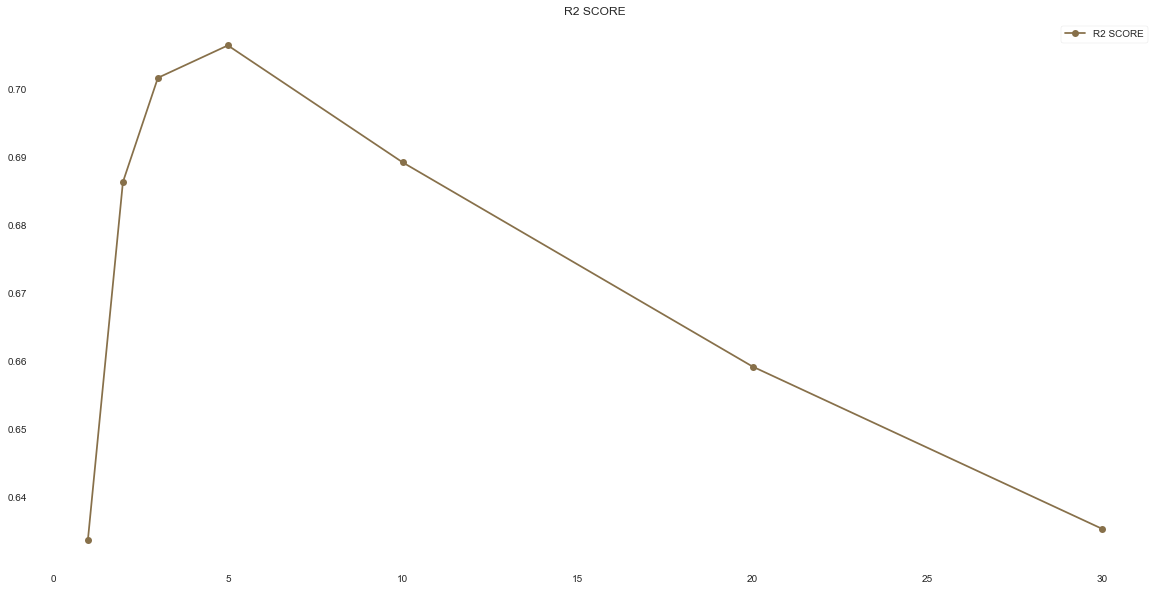

In [31]:
fig = plt.figure(figsize=(20,10))
fig_mean = plt.figure(figsize=(20,10))
fig_remse = plt.figure(figsize=(20,10))
fig_r2_score = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111)
mean_plot = fig_mean.add_subplot(111)
rmse_plot = fig_remse.add_subplot(111)
r2_score_plot = fig_r2_score.add_subplot(111)

xvals = list(range(len(y_test[:50])))

K = [1,2,3,5,10,20,30]
mean_abs_errors = []
mean_squared_errors = []
r2_score_errors = []

for k in K:

    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    y_prediction_knn = knn.fit(X_train, y_train).predict(X_test)

    mean_error = np.mean(np.absolute(y_prediction_knn - y_test))
    rmse = mean_squared_error(y_prediction_knn , y_test)
    r2_score_val = r2_score(y_prediction_knn , y_test)

    mean_abs_errors.append(mean_error)
    mean_squared_errors.append(rmse)
    r2_score_errors.append(r2_score_val)

    print('------------ Neirest Neighbors Regression (%d) ------------' % k)
    print("Mean absolute error: %.2f" % mean_error)
    print("Residual sum of squares (MSE): %.2f" % rmse)
    print("R2-score: %.2f" %  r2_score_val)

    label = 'KNN Regression (K=%d)' % k
    ax.plot(xvals, y_prediction_knn[:50], color=np.random.rand(3,), marker='o', linestyle='solid', label=label)


ax.plot(xvals, y_test[:50], 'ro-', label='Real')
ax.set(title='Predicción con Regresión Lineal', ylabel=y.name)
ax.legend()

label = 'MEAN'
mean_plot.plot(K, mean_abs_errors, color=np.random.rand(3,), marker='o', linestyle='solid', label=label)
mean_plot.set(title=label)
mean_plot.legend()

label = 'RMSE'
rmse_plot.plot(K, mean_squared_errors, color=np.random.rand(3,), marker='o', linestyle='solid', label=label)
rmse_plot.set(title=label)
rmse_plot.legend()

label = 'R2 SCORE'
r2_score_plot.plot(K, r2_score_errors, color=np.random.rand(3,), marker='o', linestyle='solid', label=label)
r2_score_plot.set(title=label)
r2_score_plot.legend()

En este caso, el algoritmo KNN de regresión se comportó de mejor manera que el polinomial, basado en las medidas de error utilizadas. En este caso, el algoritmo no tiene dificultades acercándose a los datos atípicos, y la velocidad con la que corre es muy superior (unos pocos segundos, en el peor de los casos).

Se puede ver que al ajustar el hiper parámetro K, obtenemos un error mínimo alrededor de 5 a 10 para este caso particular. Todos los demás valores tienen errores mayores.

También podemos notar que a partir de k>10 el error tiende a crecer ya que el modelo comienza a sobreajustarse a los datos